In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import scipy

In [6]:
import matplotlib.pyplot as plt

In [7]:
import statsmodels.api as sm

In [8]:
import statsmodels.formula.api as smf

In [9]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

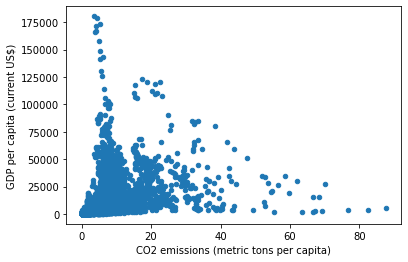

In [16]:
scatter = df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [17]:
scatter.figure.savefig('intitial scatter.pdf', dpi=300)

In [47]:
df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
0,ABW,YR1970,NaN,NaN,NaN,NaN,19.667901,NaN,10.2469,1.826198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,YR1971,NaN,NaN,NaN,NaN,19.957364,NaN,10.4531,1.826948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,YR1972,NaN,NaN,NaN,NaN,20.005770,NaN,10.6570,1.844813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,YR1973,NaN,NaN,NaN,NaN,19.716685,NaN,10.8551,1.822090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,YR1974,NaN,NaN,NaN,NaN,18.926185,NaN,11.0415,1.821157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12933,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
12934,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
12935,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN
12936,ZWE,YR2018,81.363602,NaN,NaN,0.849793,NaN,NaN,11850.0000,6470.000000,NaN,NaN,NaN,0.0,1254.642265,NaN,NaN,NaN


In [37]:
updated_df = df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)']) # not the best strategy, will figure out how to make a balanced data set?


In [45]:
updated_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
16,ABW,YR1986,NaN,NaN,NaN,2.868274,1.278786e+02,NaN,13.84720,6.474660,NaN,NaN,NaN,0.0,6472.398709,NaN,NaN,NaN
17,ABW,YR1987,NaN,NaN,NaN,7.234613,1.439411e+02,NaN,14.30170,8.943996,NaN,NaN,NaN,0.0,7885.158927,NaN,NaN,NaN
18,ABW,YR1988,NaN,NaN,NaN,10.027328,NaN,NaN,14.54990,11.000443,NaN,NaN,NaN,0.0,9765.909207,NaN,NaN,NaN
19,ABW,YR1989,NaN,NaN,NaN,10.634558,NaN,NaN,14.89810,11.871481,NaN,NaN,NaN,0.0,11392.269150,NaN,NaN,NaN
49,AFE,YR1970,NaN,NaN,NaN,1.123261,1.587419e+06,NaN,384746.71821,316355.144832,NaN,NaN,NaN,NaN,236.793425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12932,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1.933484e+03,NaN,10820.00000,5840.000000,NaN,NaN,NaN,0.0,1434.896277,NaN,NaN,NaN
12933,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2.499470e+03,NaN,11790.00000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
12934,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1.587372e+03,NaN,11380.00000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
12935,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.00000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN


In [49]:
# not the best strategy, will figure out how to make a balanced data set?
X = updated_df['CO2 emissions (metric tons per capita)']t
Y = updated_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.226
Model:                                      OLS   Adj. R-squared:                  0.226
Method:                           Least Squares   F-statistic:                     3000.
Date:                          Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                                  19:40:53   Log-Likelihood:            -1.1086e+05
No. Observations:                         10256   AIC:                         2.217e+05
Df Residuals:                             10254   BIC:                         2.217e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
GDP_CO2 = df.filter(['GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)'], axis=1)

In [15]:
print(GDP_CO2)

       GDP per capita (current US$)  CO2 emissions (metric tons per capita)
0                               NaN                                     NaN
1                               NaN                                     NaN
2                               NaN                                     NaN
3                               NaN                                     NaN
4                               NaN                                     NaN
...                             ...                                     ...
12933                   1445.069702                                0.897598
12934                   1464.588957                                0.783303
12935                   1235.189032                                0.718570
12936                   1254.642265                                0.849793
12937                   1316.740657                                     NaN

[12938 rows x 2 columns]


In [23]:
GDP_CO2.to_csv('GDP_CO2.csv')

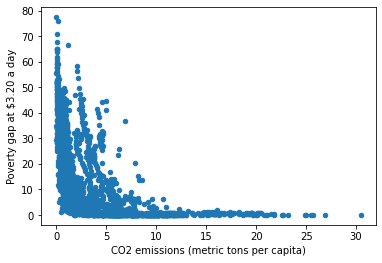

In [25]:
scatter = df.plot.scatter('CO2 emissions (metric tons per capita)', 'Poverty gap at $3.20 a day')
# countries with lower poverty gap have more emissions?

In [26]:
scatter.figure.savefig('intitial scatter2.pdf', dpi=300)

In [11]:

df_2018 = df[df['time'] == 'YR2018']


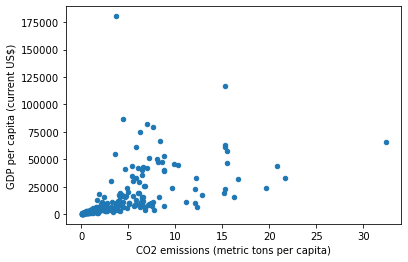

In [12]:
scatter = df_2018.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [41]:
scatter.figure.savefig('intitial scatter3pdf', dpi=300)

In [44]:
print(df.describe(include=['object']))

       economy    time
count    12938   12938
unique     264      50
top        LCA  YR2006
freq        50     264


In [19]:
main_df = df[df['time'] >= 'YR2000']
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [22]:
print(main_up_df)

      economy    time  Renewable energy consumption  \
79        AFE  YR2000                     65.132445   
80        AFE  YR2001                     65.568145   
81        AFE  YR2002                     64.578854   
82        AFE  YR2003                     64.103145   
83        AFE  YR2004                     63.216180   
...       ...     ...                           ...   
12932     ZWE  YR2014                     80.775002   
12933     ZWE  YR2015                     81.427200   
12934     ZWE  YR2016                     82.792603   
12935     ZWE  YR2017                     83.492996   
12936     ZWE  YR2018                     81.363602   

       Fossil fuel energy consumption  CO2 intensity  \
79                          46.947252       1.493292   
80                          47.435746       1.605760   
81                          46.195218       1.643917   
82                          47.271779       1.671814   
83                          48.862058       1.706934   
...

In [23]:
main_up_df.to_csv('updated.csv')

In [43]:
X = main_up_df['CO2 emissions (metric tons per capita)']
Y = main_up_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions2 = model.predict(X) 

print_model = model.summary()
print(print_model)

#plt.plot(X, predictions, color ='green')


#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,predictions,"red")



                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.362
Model:                                      OLS   Adj. R-squared:                  0.362
Method:                           Least Squares   F-statistic:                     2542.
Date:                          Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                                  17:52:56   Log-Likelihood:                -49201.
No. Observations:                          4474   AIC:                         9.841e+04
Df Residuals:                              4472   BIC:                         9.842e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


79       3974.372980
80       4127.036808
81       4135.073652
82       4208.042140
83       4308.746432
            ...     
12932    3961.271822
12933    3968.399670
12934    3724.638401
12935    3586.582767
12936    3866.443862
Length: 4474, dtype: float64


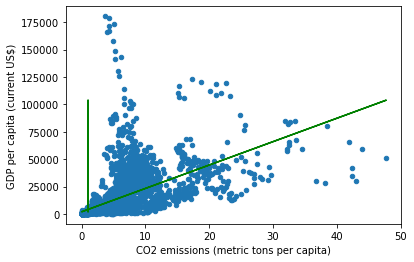

In [45]:
main_up_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')
plt.plot(X, predictions2, color ='green')
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(X,predictions,"red")
print(predictions2)



In [64]:
main_up_df['log_gdp'] = np.log(main_up_df["GDP per capita (current US$)"])

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_46866/3500380147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_up_df["GDP per capita (current US$)"])


In [66]:
main_up_df['log_co2'] = np.log(main_up_df["CO2 emissions (metric tons per capita)"])

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_46866/159712174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_co2'] = np.log(main_up_df["CO2 emissions (metric tons per capita)"])


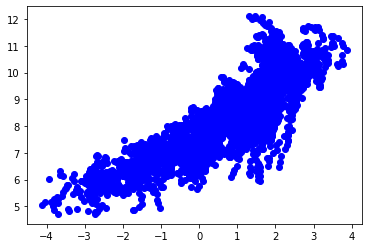

In [81]:
X = main_up_df["log_co2"]
y = main_up_df["log_gdp"]
#X = sm.add_constant(X)
#model = linear_model.LinearRegression()
#model.fit(X, y)
#model.summary()
#print(model)
plt.scatter(X, y, color = 'blue')

#main_up_df.plot.scatter('log_co2', 'log_gdp')
#plt.plot(log_co2, log_gdp, color ='green')

#plt.plot(X, model.predict(X), color='green')
